<a href="https://colab.research.google.com/github/Aswin-Kumar66/ml-practise/blob/main/Binary_Classification_with_a_Bank_Churn_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd

train = pd.read_csv('train.csv')


In [152]:
test = pd.read_csv('test.csv')

In [6]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0.0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0.0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0.0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0.0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0.0


In [7]:
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2.0,0.00,2.0,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2.0,0.00,1.0,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7.0,0.00,2.0,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8.0,0.00,1.0,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10.0,121263.62,1.0,1.0,0.0,139431.00


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98654 entries, 0 to 98653
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               98654 non-null  int64  
 1   CustomerId       98654 non-null  int64  
 2   Surname          98654 non-null  object 
 3   CreditScore      98654 non-null  int64  
 4   Geography        98654 non-null  object 
 5   Gender           98654 non-null  object 
 6   Age              98654 non-null  float64
 7   Tenure           98654 non-null  int64  
 8   Balance          98654 non-null  float64
 9   NumOfProducts    98654 non-null  int64  
 10  HasCrCard        98653 non-null  float64
 11  IsActiveMember   98653 non-null  float64
 12  EstimatedSalary  98653 non-null  float64
 13  Exited           98653 non-null  float64
dtypes: float64(6), int64(5), object(3)
memory usage: 10.5+ MB


In [9]:
train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,98654.000000,9.865400e+04,98654.000000,98654.000000,98654.000000,98654.000000,98654.000000,98653.000000,98653.000000,98653.000000,98653.000000
mean,49326.500000,1.569191e+07,656.493523,38.113391,5.027074,55549.058839,1.554179,0.755223,0.497461,112538.994836,0.211154
std,28479.101066,7.139292e+04,80.269945,8.834264,2.806522,62788.290999,0.547464,0.429957,0.499996,50339.380996,0.408130
min,0.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,24663.250000,1.563294e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74564.410000,0.000000
50%,49326.500000,1.569016e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117977.450000,0.000000
75%,73989.750000,1.575666e+07,710.000000,42.000000,7.000000,119852.010000,2.000000,1.000000,1.000000,155639.760000,0.000000
max,98653.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [10]:
train.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    1
Exited             1
dtype: int64

In [82]:
train.isna()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,False,False,False,False,False,False,False,False,False,False,False,False,False,False
165030,False,False,False,False,False,False,False,False,False,False,False,False,False,False
165031,False,False,False,False,False,False,False,False,False,False,False,False,False,False
165032,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [83]:
train.drop(index = train.index[-1] , axis = 0 , inplace = True)

In [13]:
train.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [84]:
train = train.drop_duplicates()

In [15]:
train.nunique()

id                 98653
CustomerId         18796
Surname             2647
CreditScore          456
Geography              3
Gender                 2
Age                   68
Tenure                11
Balance            20757
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary    38285
Exited                 2
dtype: int64

In [16]:
train.Geography.value_counts()

France     56383
Spain      21577
Germany    20693
Name: Geography, dtype: int64

In [17]:
train.Exited.value_counts()/train.shape[0]

0.0    0.788846
1.0    0.211154
Name: Exited, dtype: float64

In [85]:
train = train.drop('id', axis = 1)


In [153]:
test = test.drop('id', axis = 1)

In [19]:
train.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [20]:
col = ['CreditScore' , 'Age' , 'Tenure' , 'Balance' , 'EstimatedSalary']

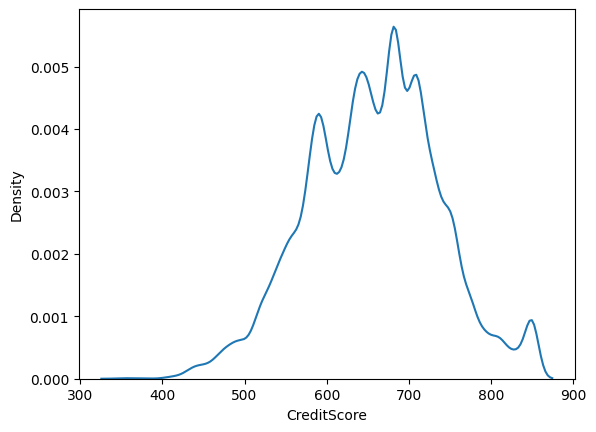

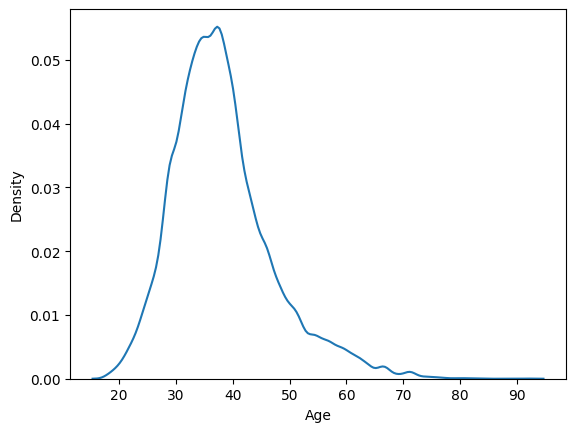

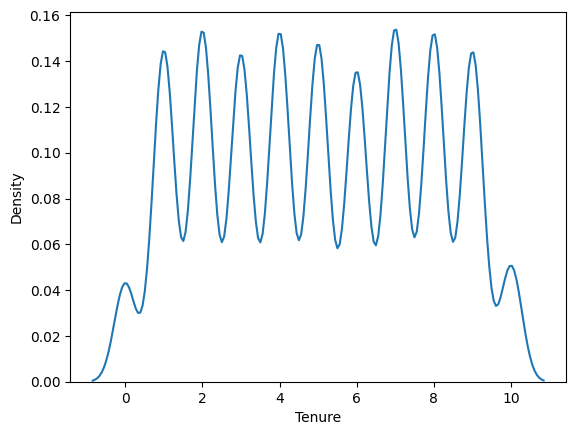

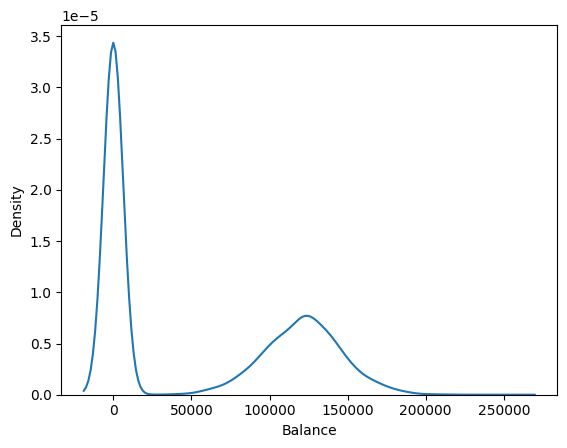

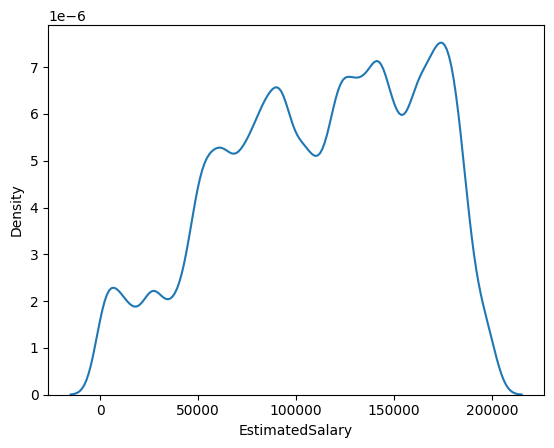

In [21]:
import seaborn as sns
from matplotlib import pyplot as plt

for i in col :
  sns.kdeplot(train[i])
  plt.show()

In [86]:
import numpy as np

df = train[['Age' , 'Balance']]

df['Age'] = np.log(df['Age'])

<ipython-input-86-522c6b8b5e0c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = np.log(df['Age'])


In [154]:
test['Age'] = np.log(test['Age'])

In [87]:
from sklearn.preprocessing import PowerTransformer

transform = PowerTransformer(method = 'yeo-johnson' , standardize=True)
data = df['Balance'].to_numpy().reshape(-1,1)

data = transform.fit_transform(data)
df['Balance'] = data

<ipython-input-87-d1dc97cb1de9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Balance'] = data


In [155]:
data = test['Balance'].to_numpy().reshape(-1 , 1)
data = transform.fit_transform(data)

test['Balance'] = data

<Axes: xlabel='Balance', ylabel='Density'>

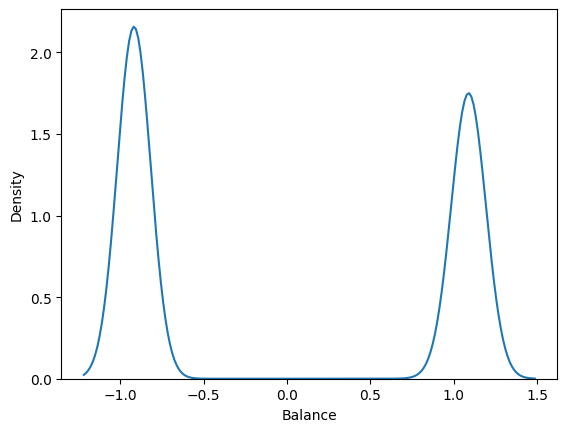

In [24]:
sns.kdeplot(df['Balance'])

In [88]:
train['Age'] = df['Age']
train['Balance'] = df['Balance']

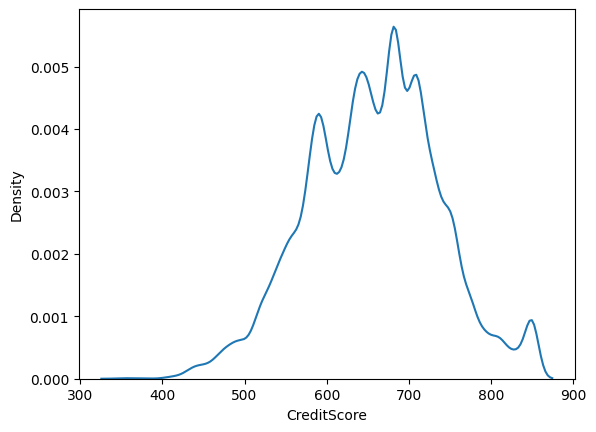

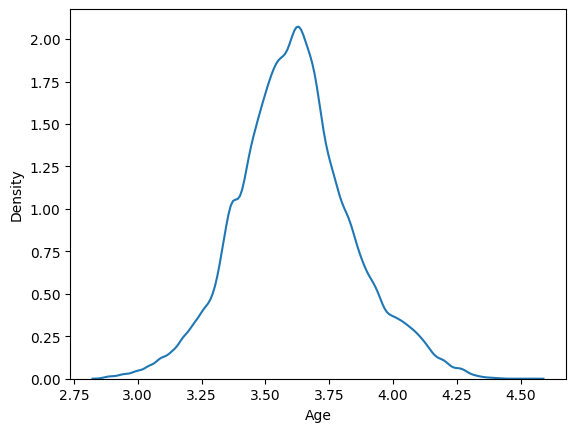

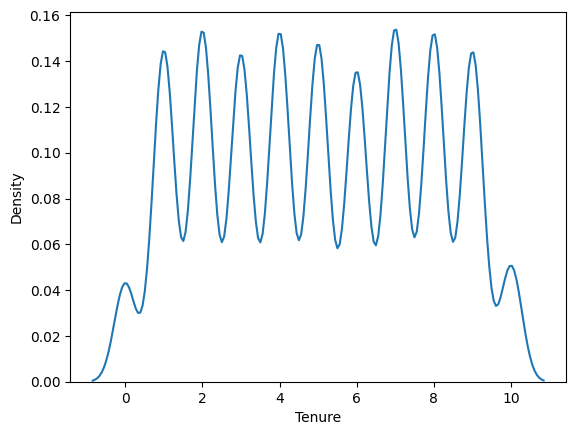

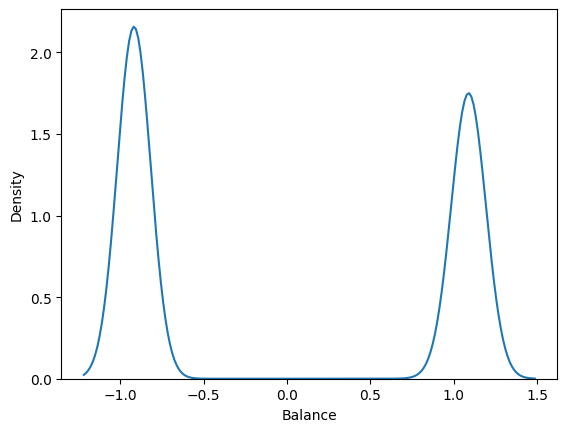

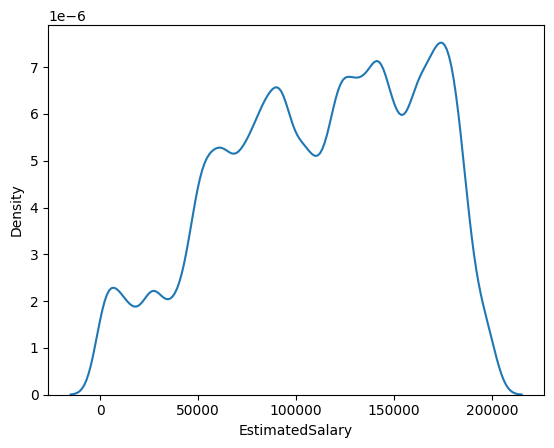

In [26]:
for i in col :
  sns.kdeplot(train[i])
  plt.show()

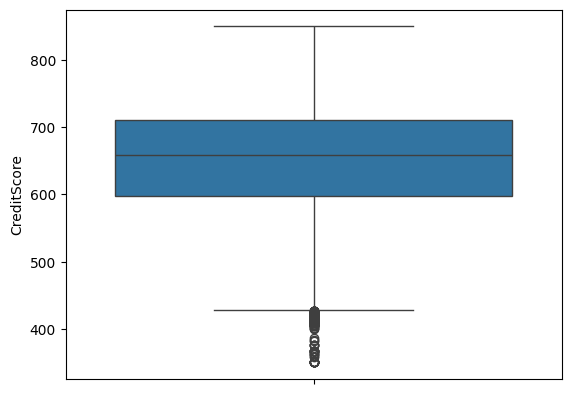

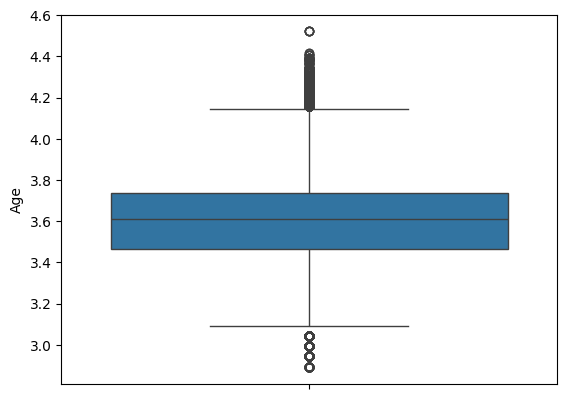

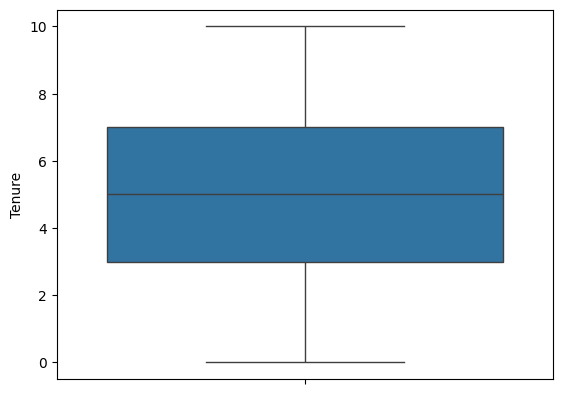

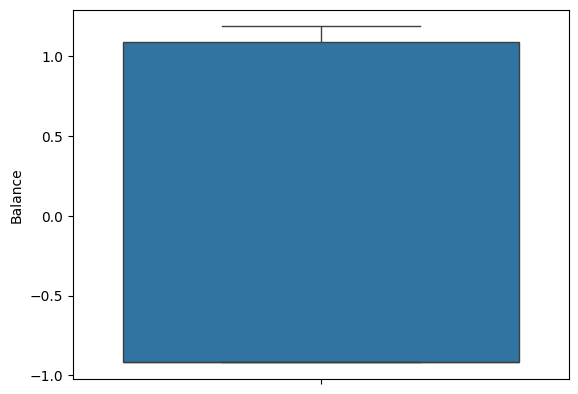

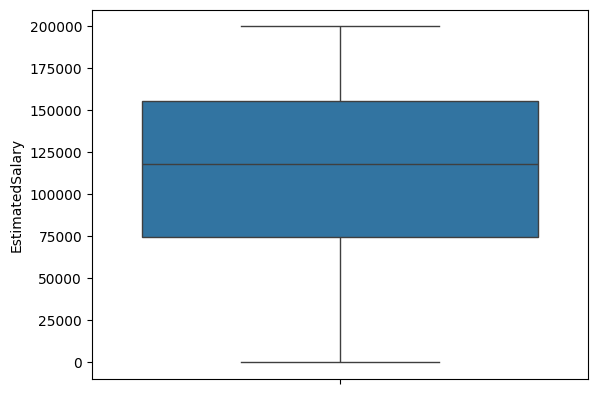

In [27]:
for i in col :
  sns.boxplot(train[i])
  plt.show()

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165033 entries, 0 to 165032
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165033 non-null  int64  
 1   Surname          165033 non-null  object 
 2   CreditScore      165033 non-null  int64  
 3   Geography        165033 non-null  object 
 4   Gender           165033 non-null  object 
 5   Age              165033 non-null  float64
 6   Tenure           165033 non-null  int64  
 7   Balance          165033 non-null  float64
 8   NumOfProducts    165033 non-null  int64  
 9   HasCrCard        165033 non-null  float64
 10  IsActiveMember   165033 non-null  float64
 11  EstimatedSalary  165033 non-null  float64
 12  Exited           165033 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 17.6+ MB


In [90]:
train = train.drop('Surname' , axis = 1)

In [91]:
def f(x) :
  if x == 'Male':
    return 1
  return 0

train['Gender'] = train['Gender'].apply(f)

In [92]:
df = pd.get_dummies(train['Geography'])

In [93]:
df

,France,Germany,Spain
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
165028,1,0,0
165029,0,0,1
165030,1,0,0
165031,1,0,0


In [94]:
train.drop('Geography' , axis = 1 , inplace = True)

In [95]:
train = pd.concat([train , df ], axis = 1)

In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165033 entries, 0 to 165032
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165033 non-null  int64  
 1   CreditScore      165033 non-null  int64  
 2   Gender           165033 non-null  int64  
 3   Age              165033 non-null  float64
 4   Tenure           165033 non-null  int64  
 5   Balance          165033 non-null  float64
 6   NumOfProducts    165033 non-null  int64  
 7   HasCrCard        165033 non-null  float64
 8   IsActiveMember   165033 non-null  float64
 9   EstimatedSalary  165033 non-null  float64
 10  Exited           165033 non-null  int64  
 11  France           165033 non-null  uint8  
 12  Germany          165033 non-null  uint8  
 13  Spain            165033 non-null  uint8  
dtypes: float64(5), int64(6), uint8(3)
memory usage: 15.6 MB


In [137]:
X = train.drop('Exited' , axis = 1)
y = train['Exited']

In [139]:
def remove_outliers_replace(data, columns, threshold=1.5):
    data_no_outliers = data.copy()

    for column in columns:
        Q1 = data_no_outliers[column].quantile(0.25)
        Q3 = data_no_outliers[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        is_outlier = (data_no_outliers[column] < lower_bound) | (data_no_outliers[column] > upper_bound)

        if data_no_outliers[column].dtype == 'O':  # Categorical column
            median_value = data_no_outliers.loc[~is_outlier, column].mode().iloc[0]
            data_no_outliers.loc[is_outlier, column] = median_value
        else:  # Numerical column
            mean_value = data_no_outliers.loc[~is_outlier, column].mean()
            data_no_outliers.loc[is_outlier, column] = mean_value

    return data_no_outliers

# columns  = ['Age' , 'Credit']
X = remove_outliers_replace(X, ['CreditScore' , 'Age'])

In [156]:
test = remove_outliers_replace(test, ['CreditScore' , 'Age'])

In [140]:
X

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,15674932,668.0,1,3.496508,3,-0.916830,2,1.0,0.0,181449.97,1,0,0
1,15749177,627.0,1,3.496508,1,-0.916830,2,1.0,1.0,49503.50,1,0,0
2,15694510,678.0,1,3.688879,10,-0.916830,2,1.0,0.0,184866.69,1,0,0
3,15741417,581.0,1,3.526361,2,1.119935,1,1.0,1.0,84560.88,1,0,0
4,15766172,716.0,1,3.496508,5,-0.916830,2,1.0,1.0,15068.83,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165028,15704770,630.0,1,3.912023,8,-0.916830,2,1.0,1.0,5962.50,1,0,0
165029,15667085,667.0,0,3.496508,2,-0.916830,1,1.0,1.0,131834.75,0,0,1
165030,15665521,792.0,1,3.555348,3,-0.916830,1,0.0,0.0,131834.45,1,0,0
165031,15664752,565.0,1,3.433987,5,-0.916830,1,1.0,1.0,127429.56,1,0,0


<Axes: ylabel='CreditScore'>

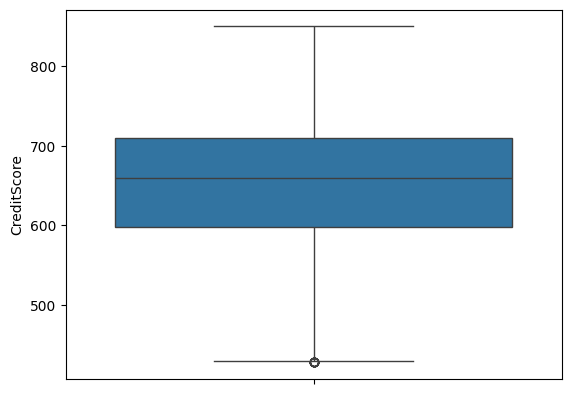

In [142]:
sns.boxplot(X['CreditScore'])

<Axes: ylabel='Age'>

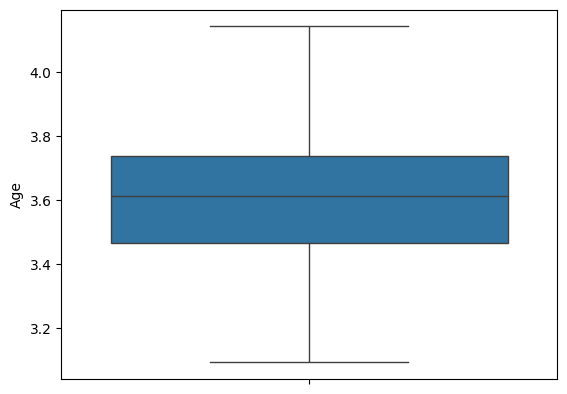

In [143]:
sns.boxplot(X['Age'])

In [144]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
s = scaler.fit(X)
X = s.transform(X)

In [145]:
X

array([[0.43694323, 0.56872038, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.73393629, 0.47156398, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.51525867, 0.59241706, 1.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.39929757, 0.86255924, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.39622143, 0.32464455, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.49567381, 0.2985782 , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [147]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators = 100)
model.fit(X_train , y_train , eval_set = [(X_test , y_test)])

[0]	validation_0-logloss:0.42697
[1]	validation_0-logloss:0.38616
[2]	validation_0-logloss:0.36250
[3]	validation_0-logloss:0.34725
[4]	validation_0-logloss:0.33788
[5]	validation_0-logloss:0.33183
[6]	validation_0-logloss:0.32782
[7]	validation_0-logloss:0.32520
[8]	validation_0-logloss:0.32354
[9]	validation_0-logloss:0.32243
[10]	validation_0-logloss:0.32164
[11]	validation_0-logloss:0.32131
[12]	validation_0-logloss:0.32103
[13]	validation_0-logloss:0.32061
[14]	validation_0-logloss:0.32047
[15]	validation_0-logloss:0.32042
[16]	validation_0-logloss:0.32038
[17]	validation_0-logloss:0.32029
[18]	validation_0-logloss:0.32018
[19]	validation_0-logloss:0.32004
[20]	validation_0-logloss:0.32008
[21]	validation_0-logloss:0.32006
[22]	validation_0-logloss:0.32003
[23]	validation_0-logloss:0.32012
[24]	validation_0-logloss:0.32010
[25]	validation_0-logloss:0.31999
[26]	validation_0-logloss:0.32000
[27]	validation_0-logloss:0.31996
[28]	validation_0-logloss:0.31988
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [148]:

from sklearn.metrics import mean_absolute_error
predictions = model.predict(X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error: 0.13618323385948436


In [149]:
pred = model.predict(X_test)

In [150]:
from sklearn.metrics import classification_report

print(classification_report(pred , y_test))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92     27749
           1       0.55      0.74      0.63      5258

    accuracy                           0.86     33007
   macro avg       0.75      0.81      0.77     33007
weighted avg       0.88      0.86      0.87     33007



In [157]:
test

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15773898,Lucchese,586.0,France,Female,3.135494,2,-0.914825,2,0.0,1.0,160976.75
1,15782418,Nott,683.0,France,Female,3.828641,2,-0.914825,1,1.0,0.0,72549.27
2,15807120,K?,656.0,France,Female,3.526361,7,-0.914825,2,1.0,0.0,138882.09
3,15808905,O'Donnell,681.0,France,Male,3.583519,8,-0.914825,1,1.0,0.0,113931.57
4,15607314,Higgins,752.0,Germany,Male,3.637586,10,1.095706,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...
110018,15662091,P'eng,570.0,Spain,Male,3.367296,7,1.090060,1,1.0,1.0,148087.62
110019,15774133,Cox,575.0,France,Female,3.583519,4,1.145040,1,1.0,1.0,42181.68
110020,15728456,Ch'iu,712.0,France,Male,3.433987,2,-0.914825,2,1.0,0.0,16287.38
110021,15687541,Yegorova,709.0,France,Female,3.465736,3,-0.914825,1,1.0,1.0,158816.58


In [158]:
test.drop('Surname' , axis = 1 , inplace = True)

In [159]:


test['Gender'] = test['Gender'].apply(f)

df = pd.get_dummies(test['Geography'])

test = pd.concat([test , df] , axis = 1)

test.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,15773898,586.0,France,0,3.135494,2,-0.914825,2,0.0,1.0,160976.75,1,0,0
1,15782418,683.0,France,0,3.828641,2,-0.914825,1,1.0,0.0,72549.27,1,0,0
2,15807120,656.0,France,0,3.526361,7,-0.914825,2,1.0,0.0,138882.09,1,0,0
3,15808905,681.0,France,1,3.583519,8,-0.914825,1,1.0,0.0,113931.57,1,0,0
4,15607314,752.0,Germany,1,3.637586,10,1.095706,1,1.0,0.0,139431.00,0,1,0


In [160]:

test.drop('Geography', axis = 1 , inplace = True)
test = s.transform(test)

test

array([[0.83282464, 0.37440758, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.86690614, 0.6042654 , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.96571849, 0.54028436, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.65104865, 0.67298578, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.48738144, 0.66587678, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.39298129, 0.45734597, 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [161]:
pred = model.predict(test)

In [162]:
a = pd.DataFrame(pred)
a

,0
0,0
1,1
2,0
3,0
4,0
...,...
110018,0
110019,0
110020,0
110021,0


In [163]:
a.to_csv('final.csv')